In [2]:
# 라이브러리 블러오기
import os
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
base_dir = './assets/datasets/osteoarthritis' # 데이터셋이 저장된 폴더

train_dir = os.path.join(base_dir, 'train') # 훈련데이터가 저장된 폴더
val_dir = os.path.join(base_dir, 'val') # 검증데이터가 저장된 폴더
test_dir = os.path.join(base_dir, 'test') # 테스트데이터가 저장된 폴더

In [4]:
def load_dataset(path):
    return torchvision.datasets.ImageFolder(root=path) # 파이토치의 이미지폴더경로를 선택해 이미지를 모두 불러오는 모듈 (root=path : path에 저장된 경로에서 불러옴)

In [5]:
train_dataset = load_dataset(train_dir) # train_dir 이 함수 내에서는 path 변수로 바뀜
val_dataset = load_dataset(val_dir) # val_dir 이 함수 내에서는 path 변수로 바뀜
test_dataset = load_dataset(test_dir) # test_dir 이 함수 내에서는 path 변수로 바뀜

In [6]:
train_dataset[0] # 훈련데이터 세트 중 첫번째 칸에 담긴 정보 (이미지 파일, 등급(0 : 정상))

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

In [7]:
train_dataset.classes # 훈련 데이터 셋에 담긴 등급 값 정보 종류 (0 ~ 4단계)

['0', '1', '2', '3', '4']

In [8]:
# 이미지 데이터를 넘파이 데이터로 변환 해주는 함수
def to_tensor(dataset):
    new_dataset = []
    for data in list(dataset):
        img = data[0].copy().convert('L') # 이미지를 흑백이미지로 변환해서 img변수에 저장
        new_dataset.append([np.array(img), np.array(data[1])])
    return new_dataset

In [9]:
train_scaled = to_tensor(train_dataset)
val_scaled = to_tensor(val_dataset)
test_scaled = to_tensor(test_dataset)

In [13]:
train_scaled[0], train_scaled[0][0].shape # 훈련데이터 셋의 첫번째 이미지를 넘파이로 변환한 값과 차원정보(흑백이기 때문에 224x224크기의 2차원 데이터)

([array([[89, 91, 93, ..., 85, 81, 76],
         [89, 91, 91, ..., 84, 79, 74],
         [90, 90, 92, ..., 83, 79, 76],
         ...,
         [36, 36, 38, ..., 78, 79, 79],
         [36, 35, 38, ..., 81, 80, 80],
         [36, 36, 37, ..., 82, 82, 80]], dtype=uint8),
  array(0)],
 (224, 224))

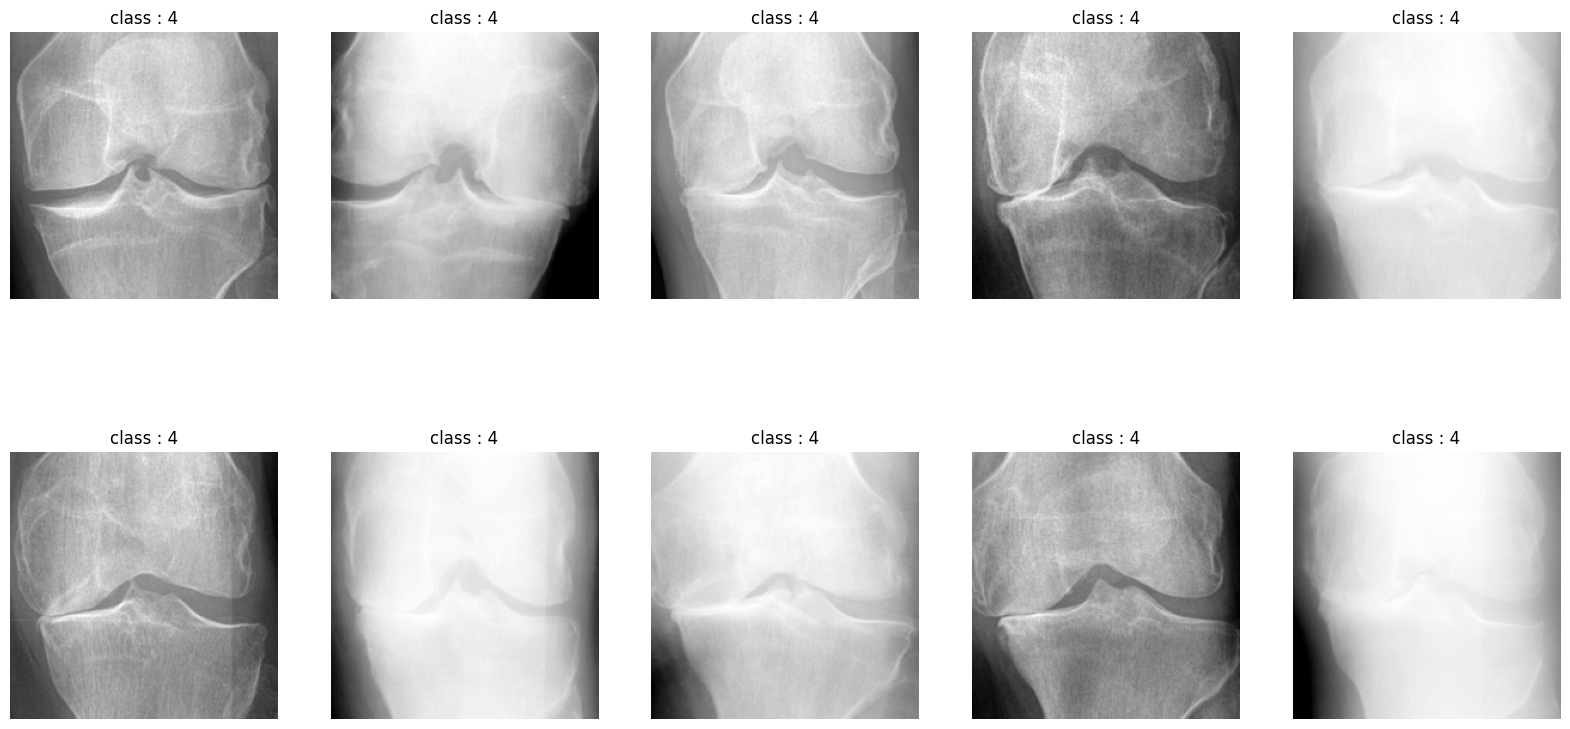

In [10]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for ax, data in zip(axs.flat, val_scaled[-10:]): # 검증데이터 마지막 10개만 뽑아서 하나씩 출력
    ax.imshow(data[0], cmap='gray') # 이미지 흑백 표시
    ax.set_title(f'class : {data[1]}') # 등급 표시
    ax.axis('off') # x축 y축 그리기 제거